In [4]:
import matplotlib.pyplot as plt
import numpy as np
from multiprocessing.pool import Pool

from collections import OrderedDict
import sys
import os
print(os.getcwd())
sys.path.insert(0, os.getcwd()+'/...') # +'/..'
sys.path.insert(0, os.getcwd()+'/..') # +'/..'
sys.path.insert(0, os.getcwd()+'/') # +'/..'
from IPython.display import clear_output

/home/sheikh/Motius/Thesis/synch_signal_detection_dl/tools/sionna/examples/myTests


In [6]:
from sionna.mapping import Mapper
from sionna.mapping import Constellation

In [45]:
def generate_ieee8211_constellation(mu = 1, normalize = True, show_constellation = False):
    assert mu in (1,2,4,6),\
    "currently ony supports mu  = 1, 2, 4, and 6"
    if mu == 1:
        mapping_table = {
        (0,) : -1.+0.j,
        (1,) :  1.+0.j
        }
    elif mu == 2:
        mapping_table = {
            (0,0) : -1.-1.j,
            (0,1) : -1.+1.j,
            (1,0) :  1.-1.j,
            (1,1) :  1.+1.j
        }
    elif mu == 4:
        mapping_table = {
            (0,0,0,0) : -3.-3.j,
            (0,0,0,1) : -3.-1.j,
            (0,0,1,0) : -3.+3.j,
            (0,0,1,1) : -3.+1.j,
            (0,1,0,0) : -1.-3.j,
            (0,1,0,1) : -1.-1.j,
            (0,1,1,0) : -1.+3.j,
            (0,1,1,1) : -1.+1.j,
            (1,0,0,0) :  3.-3.j,
            (1,0,0,1) :  3.-1.j,
            (1,0,1,0) :  3.+3.j,
            (1,0,1,1) :  3.+1.j,
            (1,1,0,0) :  1.-3.j,
            (1,1,0,1) :  1.-1.j,
            (1,1,1,0) :  1.+3.j,
            (1,1,1,1) :  1.+1.j
        }
    elif mu == 6:
        mapping_table = {
            (0,0,0,0,0,0)   :  -7.-7.j, 
            (0,0,0,0,0,1)   :  -7.-5.j, 
            (0,0,0,0,1,0)   :  -7.-1.j, 
            (0,0,0,0,1,1)   :  -7.-3.j, 
            (0,0,0,1,0,0)   :  -7.+7.j, 
            (0,0,0,1,0,1)   :  -7.+5.j, 
            (0,0,0,1,1,0)   :  -7.+1.j, 
            (0,0,0,1,1,1)   :  -7.+3.j, 
            (0,0,1,0,0,0)   :  -5.-7.j, 
            (0,0,1,0,0,1)   :  -5.-5.j, 
            (0,0,1,0,1,0)   :  -5.-1.j, 
            (0,0,1,0,1,1)   :  -5.-3.j, 
            (0,0,1,1,0,0)   :  -5.+7.j, 
            (0,0,1,1,0,1)   :  -5.+5.j, 
            (0,0,1,1,1,0)   :  -5.+1.j, 
            (0,0,1,1,1,1)   :  -5.+3.j, 
            (0,1,0,0,0,0)   :  -1.-7.j, 
            (0,1,0,0,0,1)   :  -1.-5.j, 
            (0,1,0,0,1,0)   :  -1.-1.j, 
            (0,1,0,0,1,1)   :  -1.-3.j, 
            (0,1,0,1,0,0)   :  -1.+7.j, 
            (0,1,0,1,0,1)   :  -1.+5.j, 
            (0,1,0,1,1,0)   :  -1.+1.j, 
            (0,1,0,1,1,1)   :  -1.+3.j, 
            (0,1,1,0,0,0)   :  -3.-7.j, 
            (0,1,1,0,0,1)   :  -3.-5.j, 
            (0,1,1,0,1,0)   :  -3.-1.j, 
            (0,1,1,0,1,1)   :  -3.-3.j, 
            (0,1,1,1,0,0)   :  -3.+7.j, 
            (0,1,1,1,0,1)   :  -3.+5.j, 
            (0,1,1,1,1,0)   :  -3.+1.j, 
            (0,1,1,1,1,1)   :  -3.+3.j, 
            (1,0,0,0,0,0)   :   7.-7.j, 
            (1,0,0,0,0,1)   :   7.-5.j, 
            (1,0,0,0,1,0)   :   7.-1.j, 
            (1,0,0,0,1,1)   :   7.-3.j, 
            (1,0,0,1,0,0)   :   7.+7.j, 
            (1,0,0,1,0,1)   :   7.+5.j, 
            (1,0,0,1,1,0)   :   7.+1.j, 
            (1,0,0,1,1,1)   :   7.+3.j, 
            (1,0,1,0,0,0)   :   5.-7.j, 
            (1,0,1,0,0,1)   :   5.-5.j, 
            (1,0,1,0,1,0)   :   5.-1.j, 
            (1,0,1,0,1,1)   :   5.-3.j, 
            (1,0,1,1,0,0)   :   5.+7.j, 
            (1,0,1,1,0,1)   :   5.+5.j, 
            (1,0,1,1,1,0)   :   5.+1.j, 
            (1,0,1,1,1,1)   :   5.+3.j, 
            (1,1,0,0,0,0)   :   1.-7.j, 
            (1,1,0,0,0,1)   :   1.-5.j, 
            (1,1,0,0,1,0)   :   1.-1.j, 
            (1,1,0,0,1,1)   :   1.-3.j, 
            (1,1,0,1,0,0)   :   1.+7.j, 
            (1,1,0,1,0,1)   :   1.+5.j, 
            (1,1,0,1,1,0)   :   1.+1.j, 
            (1,1,0,1,1,1)   :   1.+3.j, 
            (1,1,1,0,0,0)   :   3.-7.j, 
            (1,1,1,0,0,1)   :   3.-5.j, 
            (1,1,1,0,1,0)   :   3.-1.j, 
            (1,1,1,0,1,1)   :   3.-3.j, 
            (1,1,1,1,0,0)   :   3.+7.j, 
            (1,1,1,1,0,1)   :   3.+5.j, 
            (1,1,1,1,1,0)   :   3.+1.j, 
            (1,1,1,1,1,1)   :   3.+3.j
        }
    else:
        mapping_table = None
        
    initial_value = np.array(list(mapping_table.values()),
                            dtype= complex)
    constellation = Constellation("custom", num_bits_per_symbol = mu, initial_value=initial_value,
                normalize=normalize, center=False, trainable=True)
    if show_constellation:
        constellation.show(figsize=(10, 10))
    return constellation

    
    

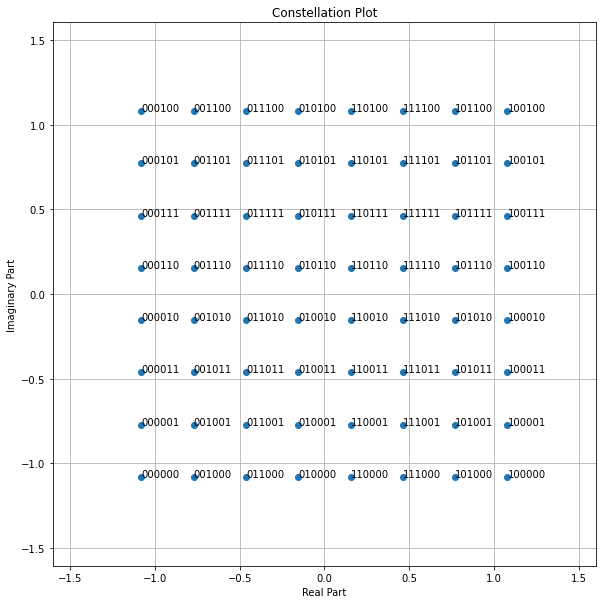

In [46]:
constellation = generate_ieee8211_constellation(6,True, True)



In [52]:
mu = 2
constellation = Constellation("qam", num_bits_per_symbol = 1,
            normalize=False, center=False, trainable=True)
constellation.show(figsize=(10, 10))




AssertionError: num_bits_per_symbol must be a mutliple of 2